# Pruebas nuevo voxelizado 

In [1]:
import tables as tb
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import invisible_cities.io.dst_io as dio

import matplotlib.pyplot as plt
from   mpl_toolkits.mplot3d import Axes3D
from utils.plotting_utils import plot_adaption_hits_to_voxel_scale, plot_cloud_voxels_and_hits, plot_3d_hits, plot_3d_vox
from utils.plotting_utils import plot_label_creator

## Cuando el tamaño de voxel no da para una division exacta de todo el espacio, se pueden centrar o no

Por ejemplo, en z para un tamaño de voxel de 4, tenemos que bajar de un tamaño total de 550 a 548 para poder encajar ese tamaño. Antes, con el voxelizado normal, obligatoriamente tenía que usar el espacio de [0, 548], es decir, perder 2mm solo en un extremo del detector, haciéndolo asimétrico por así decirlo. Con el nuevo labelling, sin embargo, me es posible hacer que pierda lo mismo por ambos lados! (si lo sobrante es divisible entre dos claro, si no pues tendremos que decidir igualmente esa asimetría). Es decir, puedo decidir que empiece en el mm 1, y por tanto con un tamaño de 548 el rango cubierto será de [0, 549], dejando otro mm al final!

In [16]:
labelled_file = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_prueba_correctlabelling.h5'
labelled_file_n = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_new_voxel_limits.h5'
labelled_file_nn = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_new_voxel_limits_as_before.h5'
labelled_file_f = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_new_voxel_limits_float.h5'

In [3]:
labelled_MC_voxels = dio.load_dst(labelled_file, 'DATASET', 'MCVoxels')
labelled_MC_hits   = dio.load_dst(labelled_file, 'DATASET', 'MCHits')
labelled_beersheba_voxels = dio.load_dst(labelled_file, 'DATASET', 'BeershebaVoxels')
eventInfo = dio.load_dst(labelled_file, 'DATASET', 'EventsInfo')
binsInfo  = dio.load_dst(labelled_file, 'DATASET', 'BinsInfo')

labelled_MC_voxels_n = dio.load_dst(labelled_file_n, 'DATASET', 'MCVoxels')
labelled_MC_hits_n   = dio.load_dst(labelled_file_n, 'DATASET', 'MCHits')
labelled_beersheba_voxels_n = dio.load_dst(labelled_file_n, 'DATASET', 'BeershebaVoxels')
eventInfo_n = dio.load_dst(labelled_file_n, 'DATASET', 'EventsInfo')
binsInfo_n  = dio.load_dst(labelled_file_n, 'DATASET', 'BinsInfo')

labelled_MC_voxels_nn = dio.load_dst(labelled_file_nn, 'DATASET', 'MCVoxels')
labelled_MC_hits_nn   = dio.load_dst(labelled_file_nn, 'DATASET', 'MCHits')
labelled_beersheba_voxels_nn = dio.load_dst(labelled_file_nn, 'DATASET', 'BeershebaVoxels')
eventInfo_nn = dio.load_dst(labelled_file_nn, 'DATASET', 'EventsInfo')
binsInfo_nn  = dio.load_dst(labelled_file_nn, 'DATASET', 'BinsInfo')

In [18]:
dio.load_dst(labelled_file_f, 'DATASET', 'BeershebaVoxels')

,xbin,ybin,zbin,energy,binclass,MC_ener,ratio,segclass,dataset_id
0,39,65,69,0.001236,0,NaN,NaN,5,0
1,40,64,69,0.000169,0,NaN,NaN,5,0
2,40,65,69,0.010954,0,0.005233,1.0,2,0
3,40,65,70,0.008081,0,NaN,NaN,5,0
4,40,66,68,0.000420,0,NaN,NaN,5,0
...,...,...,...,...,...,...,...,...,...
633902,53,43,117,0.000397,0,NaN,NaN,4,3058
633903,53,44,117,0.000078,0,NaN,NaN,4,3058
633904,54,38,110,0.000048,0,NaN,NaN,4,3058
633905,54,39,110,0.000716,0,NaN,NaN,4,3058


In [4]:
binsInfo

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,min_z,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th
0,-220.0,440.0,5.0,220.0,89.0,-220.0,440.0,5.0,220.0,89.0,0.0,548.0,4.0,548.0,138.0,198.0,0.25,NaN,0.1


In [5]:
binsInfo_n

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,min_z,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th
0,-220.0,440.0,5.0,220.0,89.0,-220.0,440.0,5.0,220.0,89.0,1.0,548.0,4.0,549.0,138.0,198.0,0.25,NaN,0.1


In [7]:
binsInfo_nn

,min_x,total_x,size_x,max_x,nbins_x,min_y,total_y,size_y,max_y,nbins_y,min_z,total_z,size_z,max_z,nbins_z,Rmax,loss_th,ener_th,sb_th
0,-220.0,440.0,5.0,220.0,89.0,-220.0,440.0,5.0,220.0,89.0,0.0,548.0,4.0,548.0,138.0,198.0,0.25,NaN,0.1


In [8]:
voxel_size = (binsInfo.size_x.values[0], binsInfo.size_y.values[0], binsInfo.size_z.values[0])
start_bin = (binsInfo.min_x.values[0], binsInfo.min_y.values[0], binsInfo.min_z.values[0])

In [12]:
idx = 5

In [13]:
ev_MC_vox   = labelled_MC_voxels[labelled_MC_voxels.dataset_id == idx]
ev_MC_vox_n = labelled_MC_voxels_n[labelled_MC_voxels_n.dataset_id == idx]
ev_MC_vox_nn = labelled_MC_voxels_nn[labelled_MC_voxels_nn.dataset_id == idx]

ev_beersh_vox   = labelled_beersheba_voxels[labelled_beersheba_voxels.dataset_id == idx]
ev_beersh_vox_n = labelled_beersheba_voxels_n[labelled_beersheba_voxels_n.dataset_id == idx]
ev_beersh_vox_nn = labelled_beersheba_voxels_nn[labelled_beersheba_voxels_nn.dataset_id == idx]

<IPython.core.display.Javascript object>


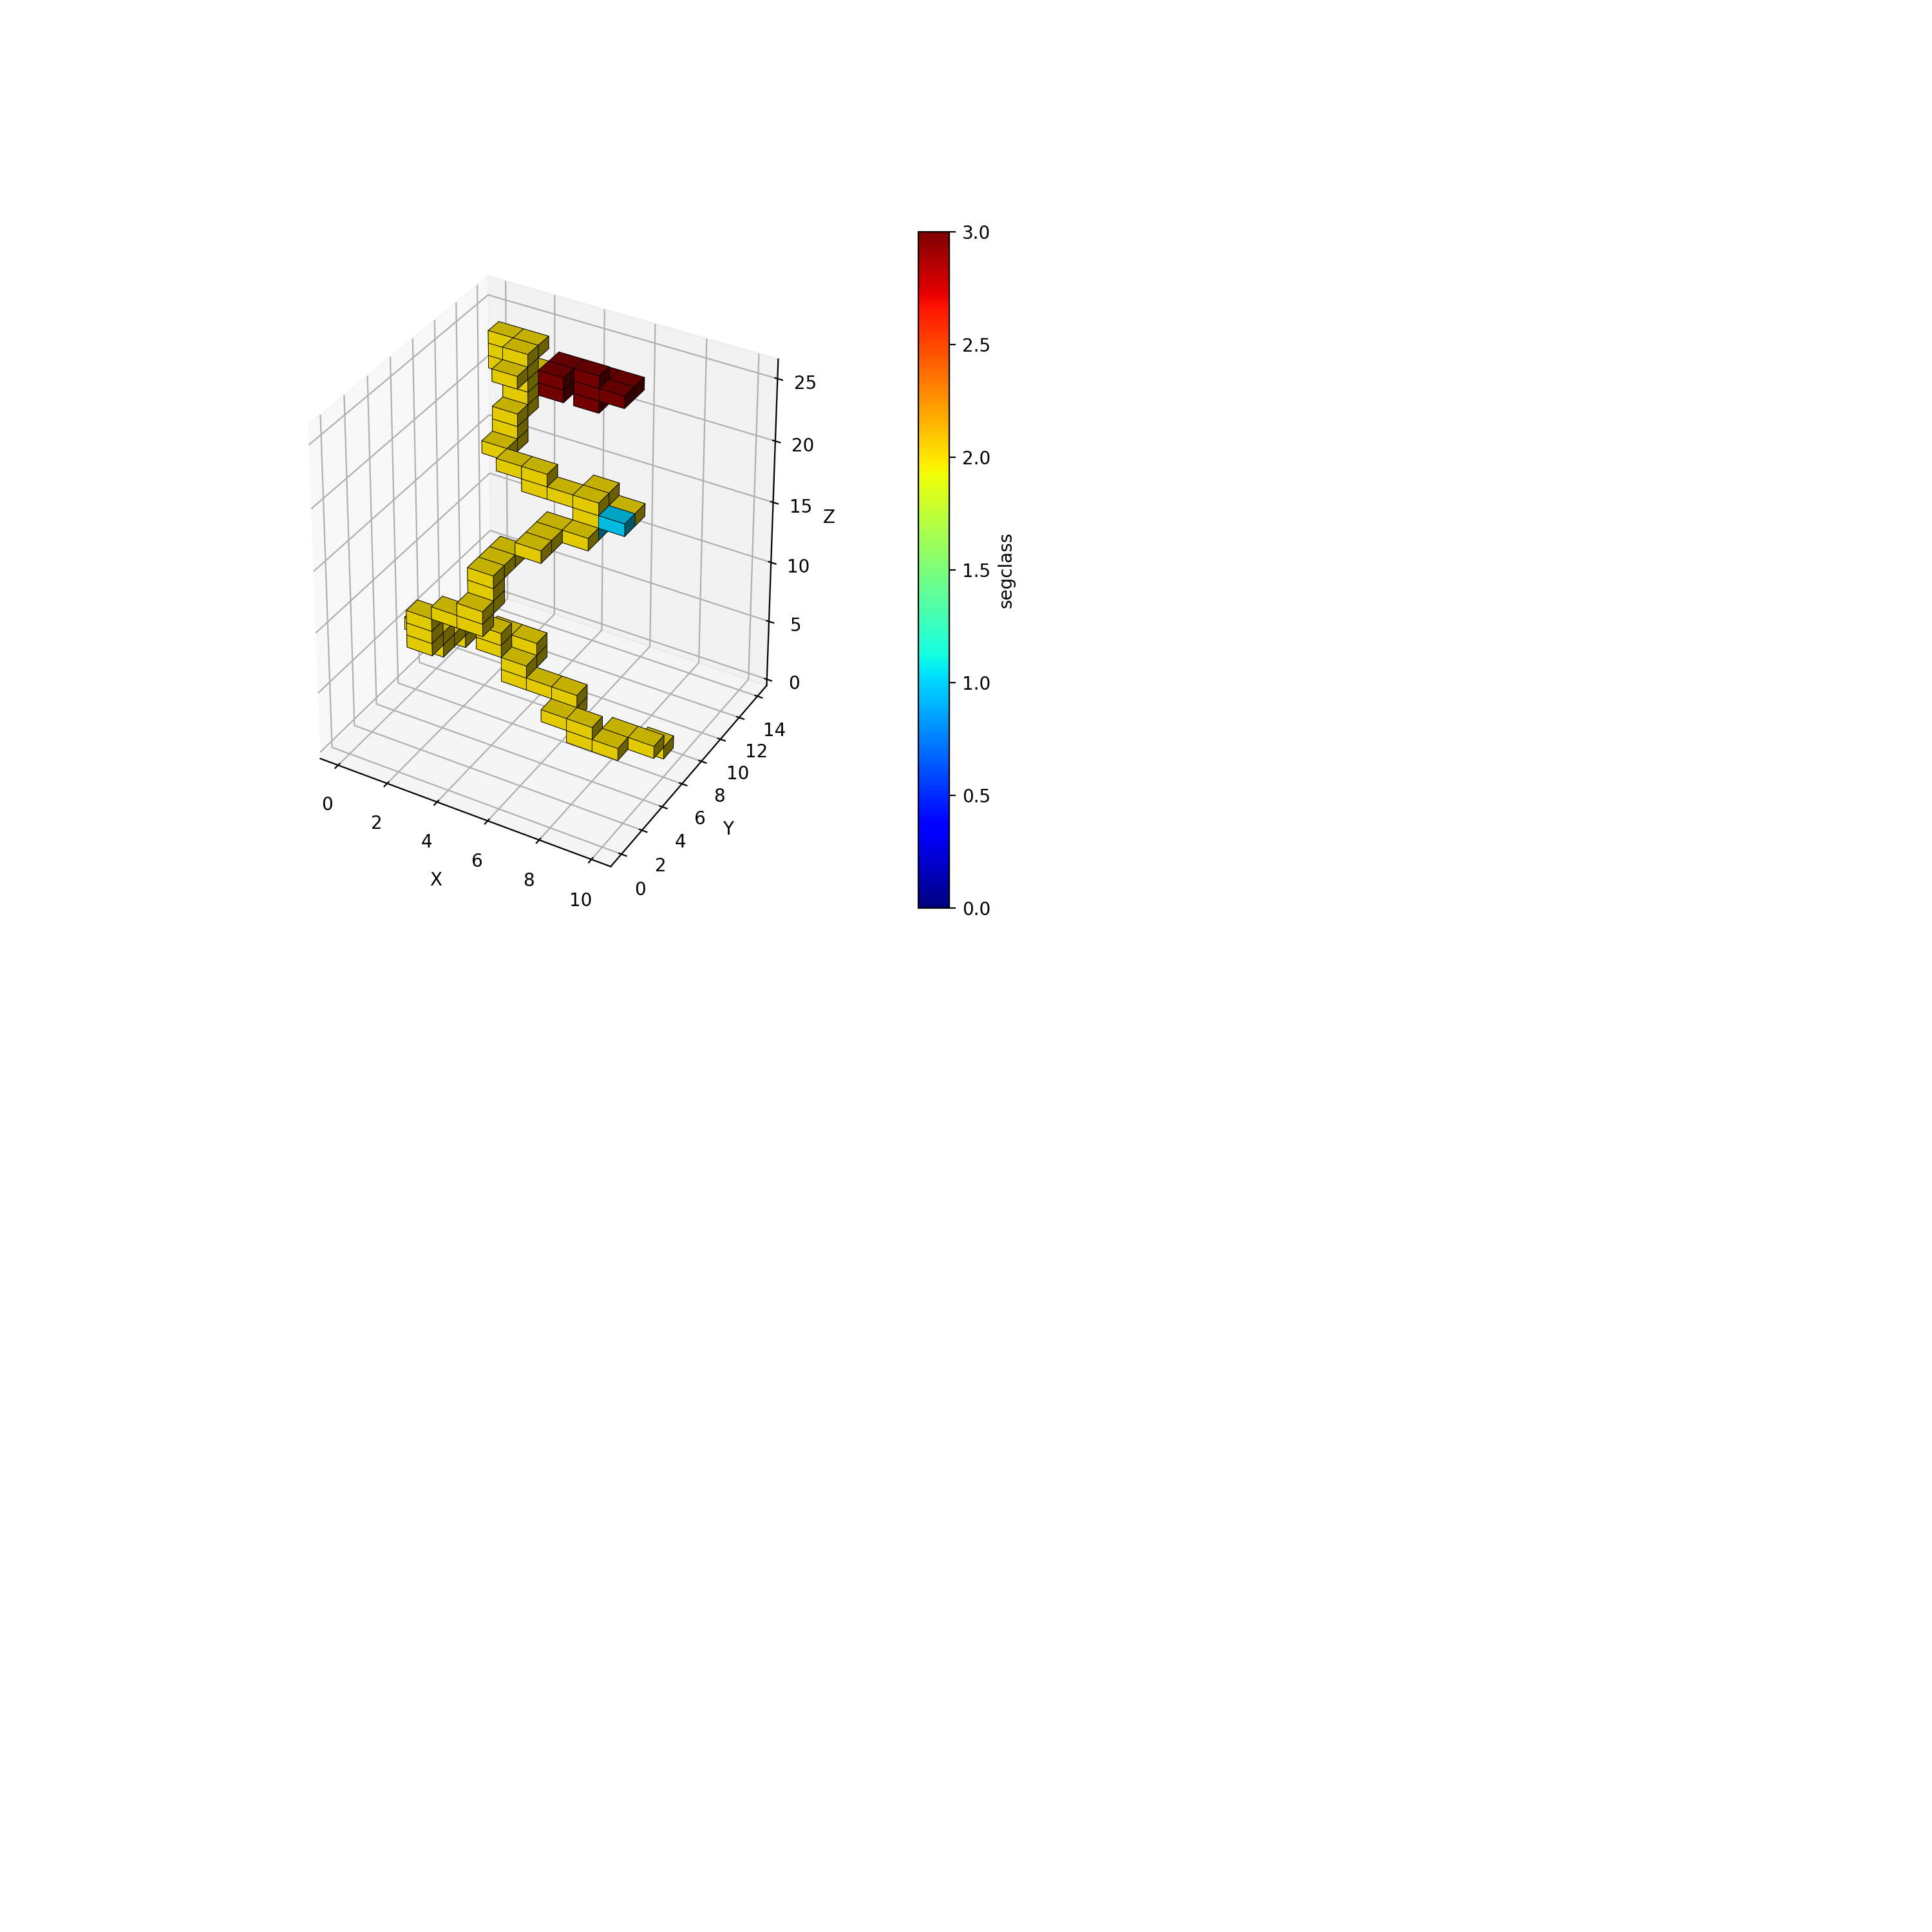

<IPython.core.display.Javascript object>


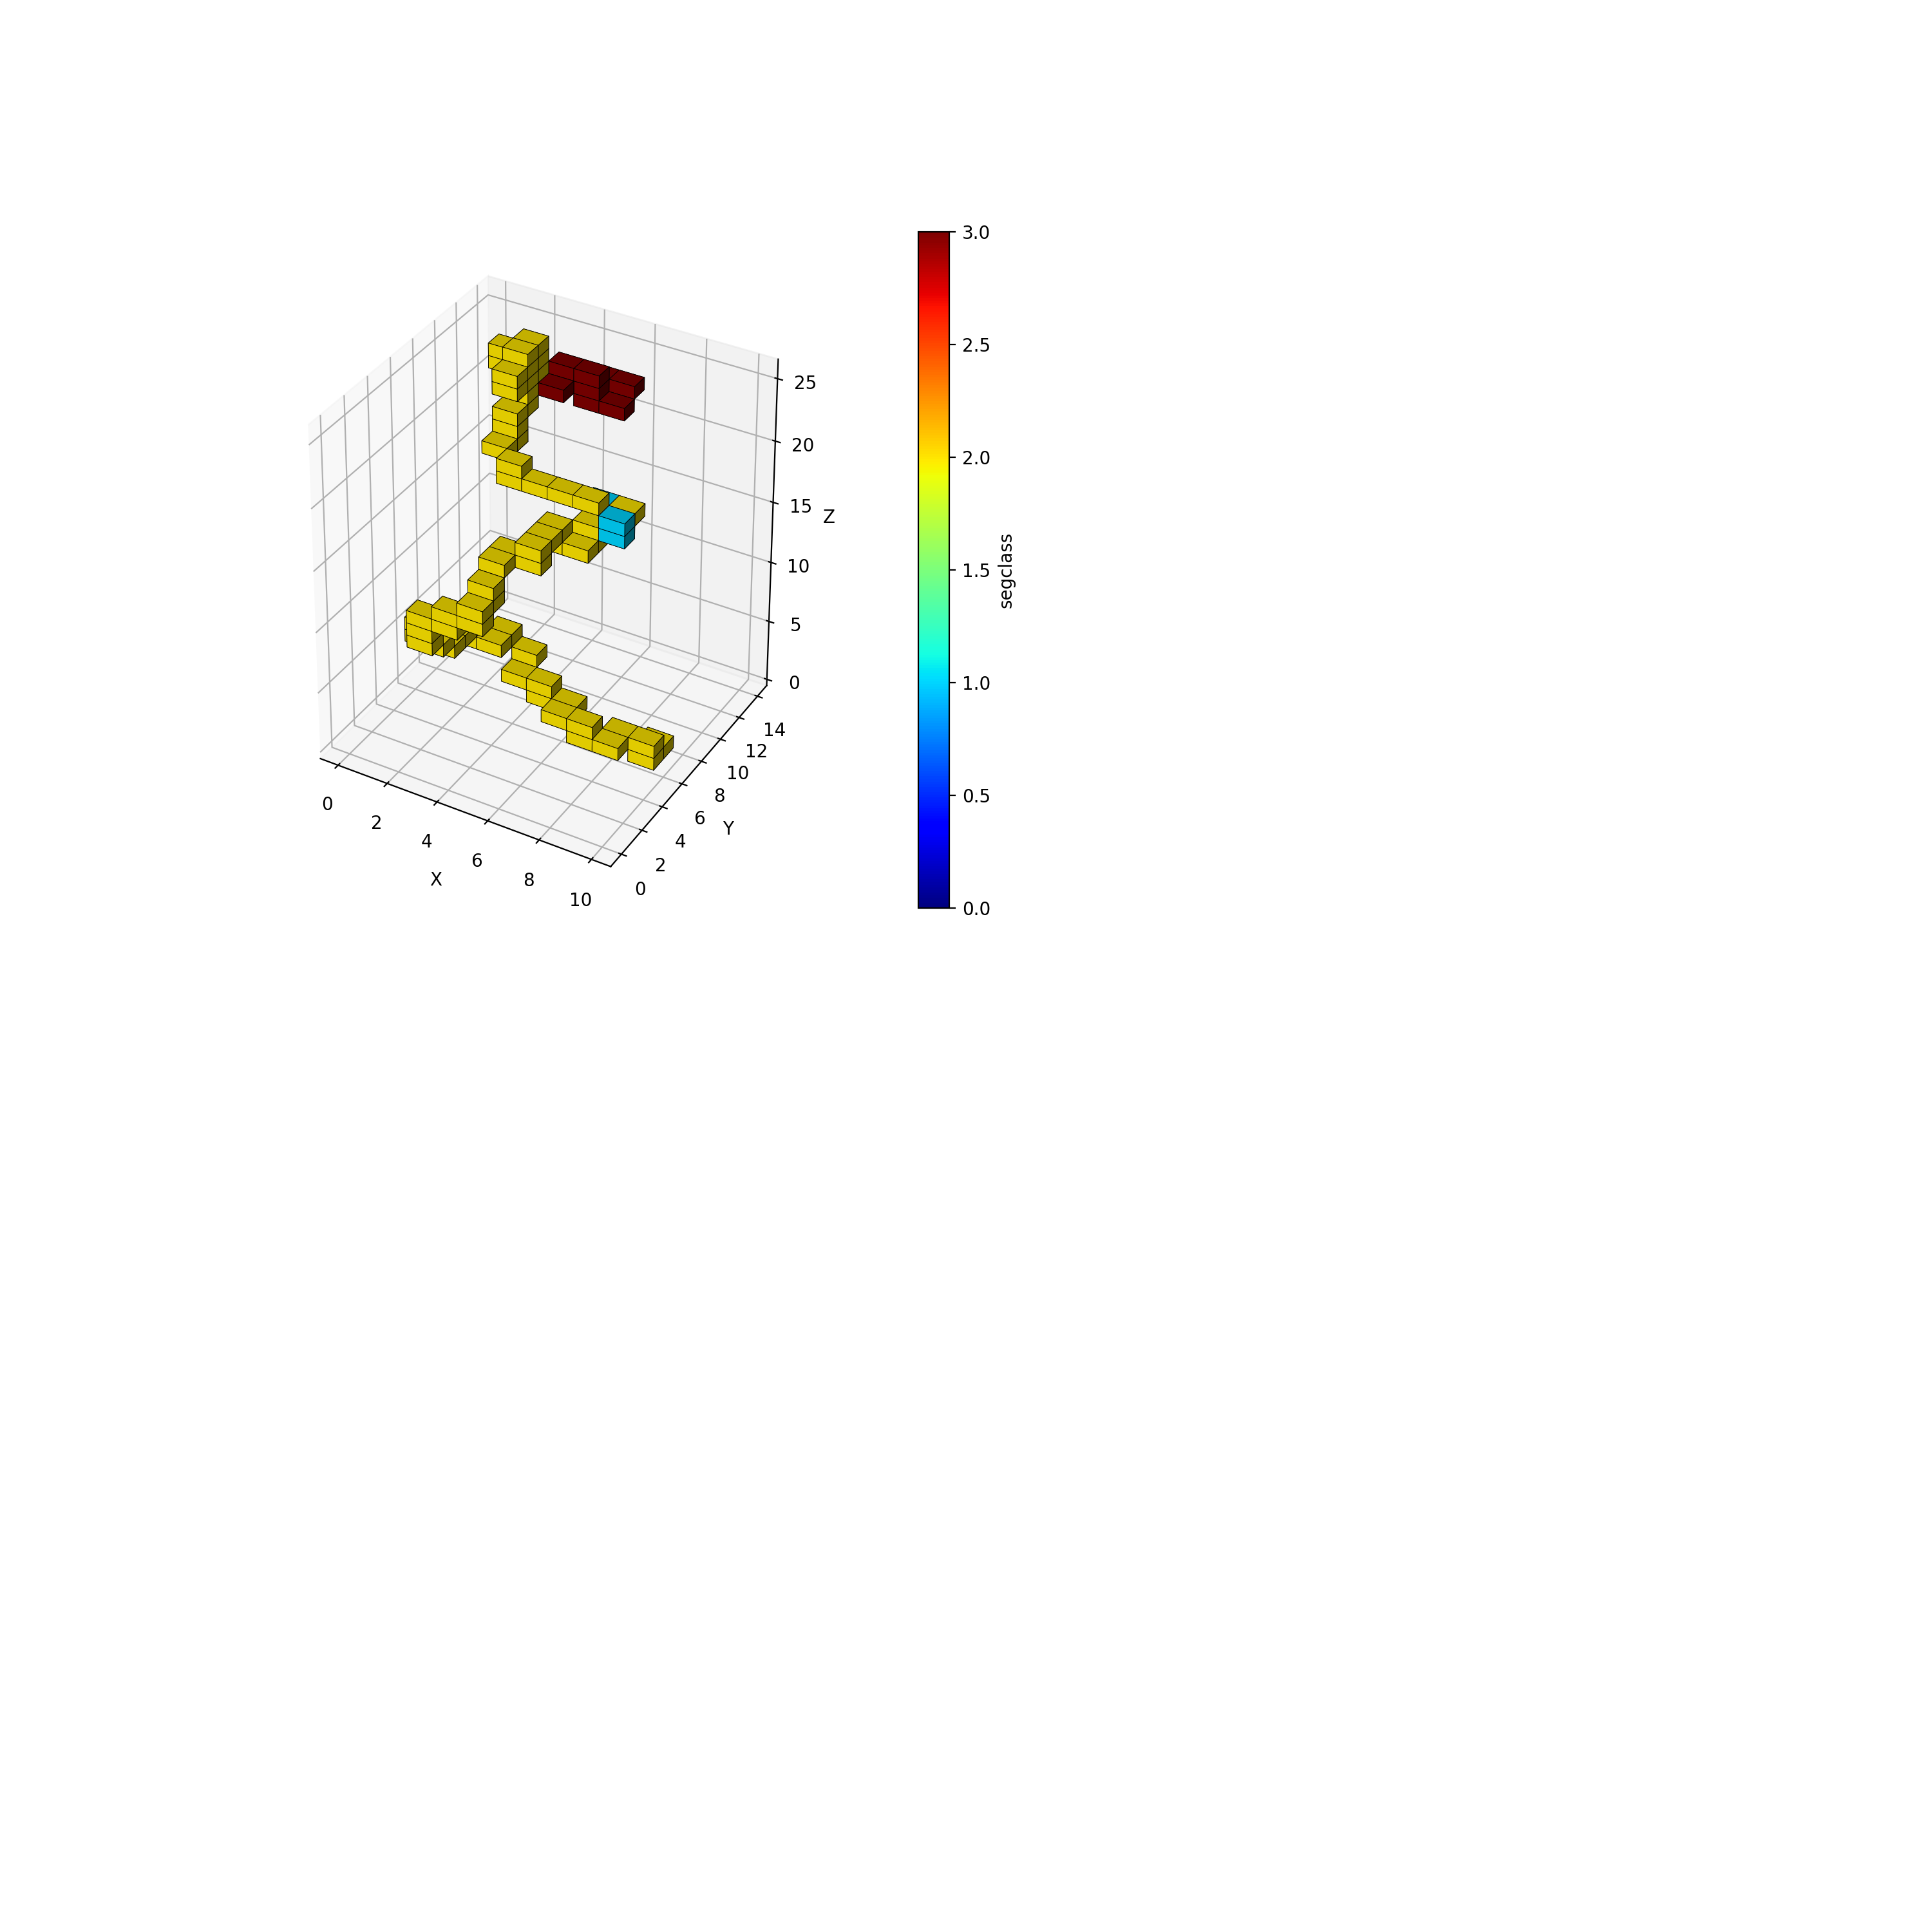

<IPython.core.display.Javascript object>


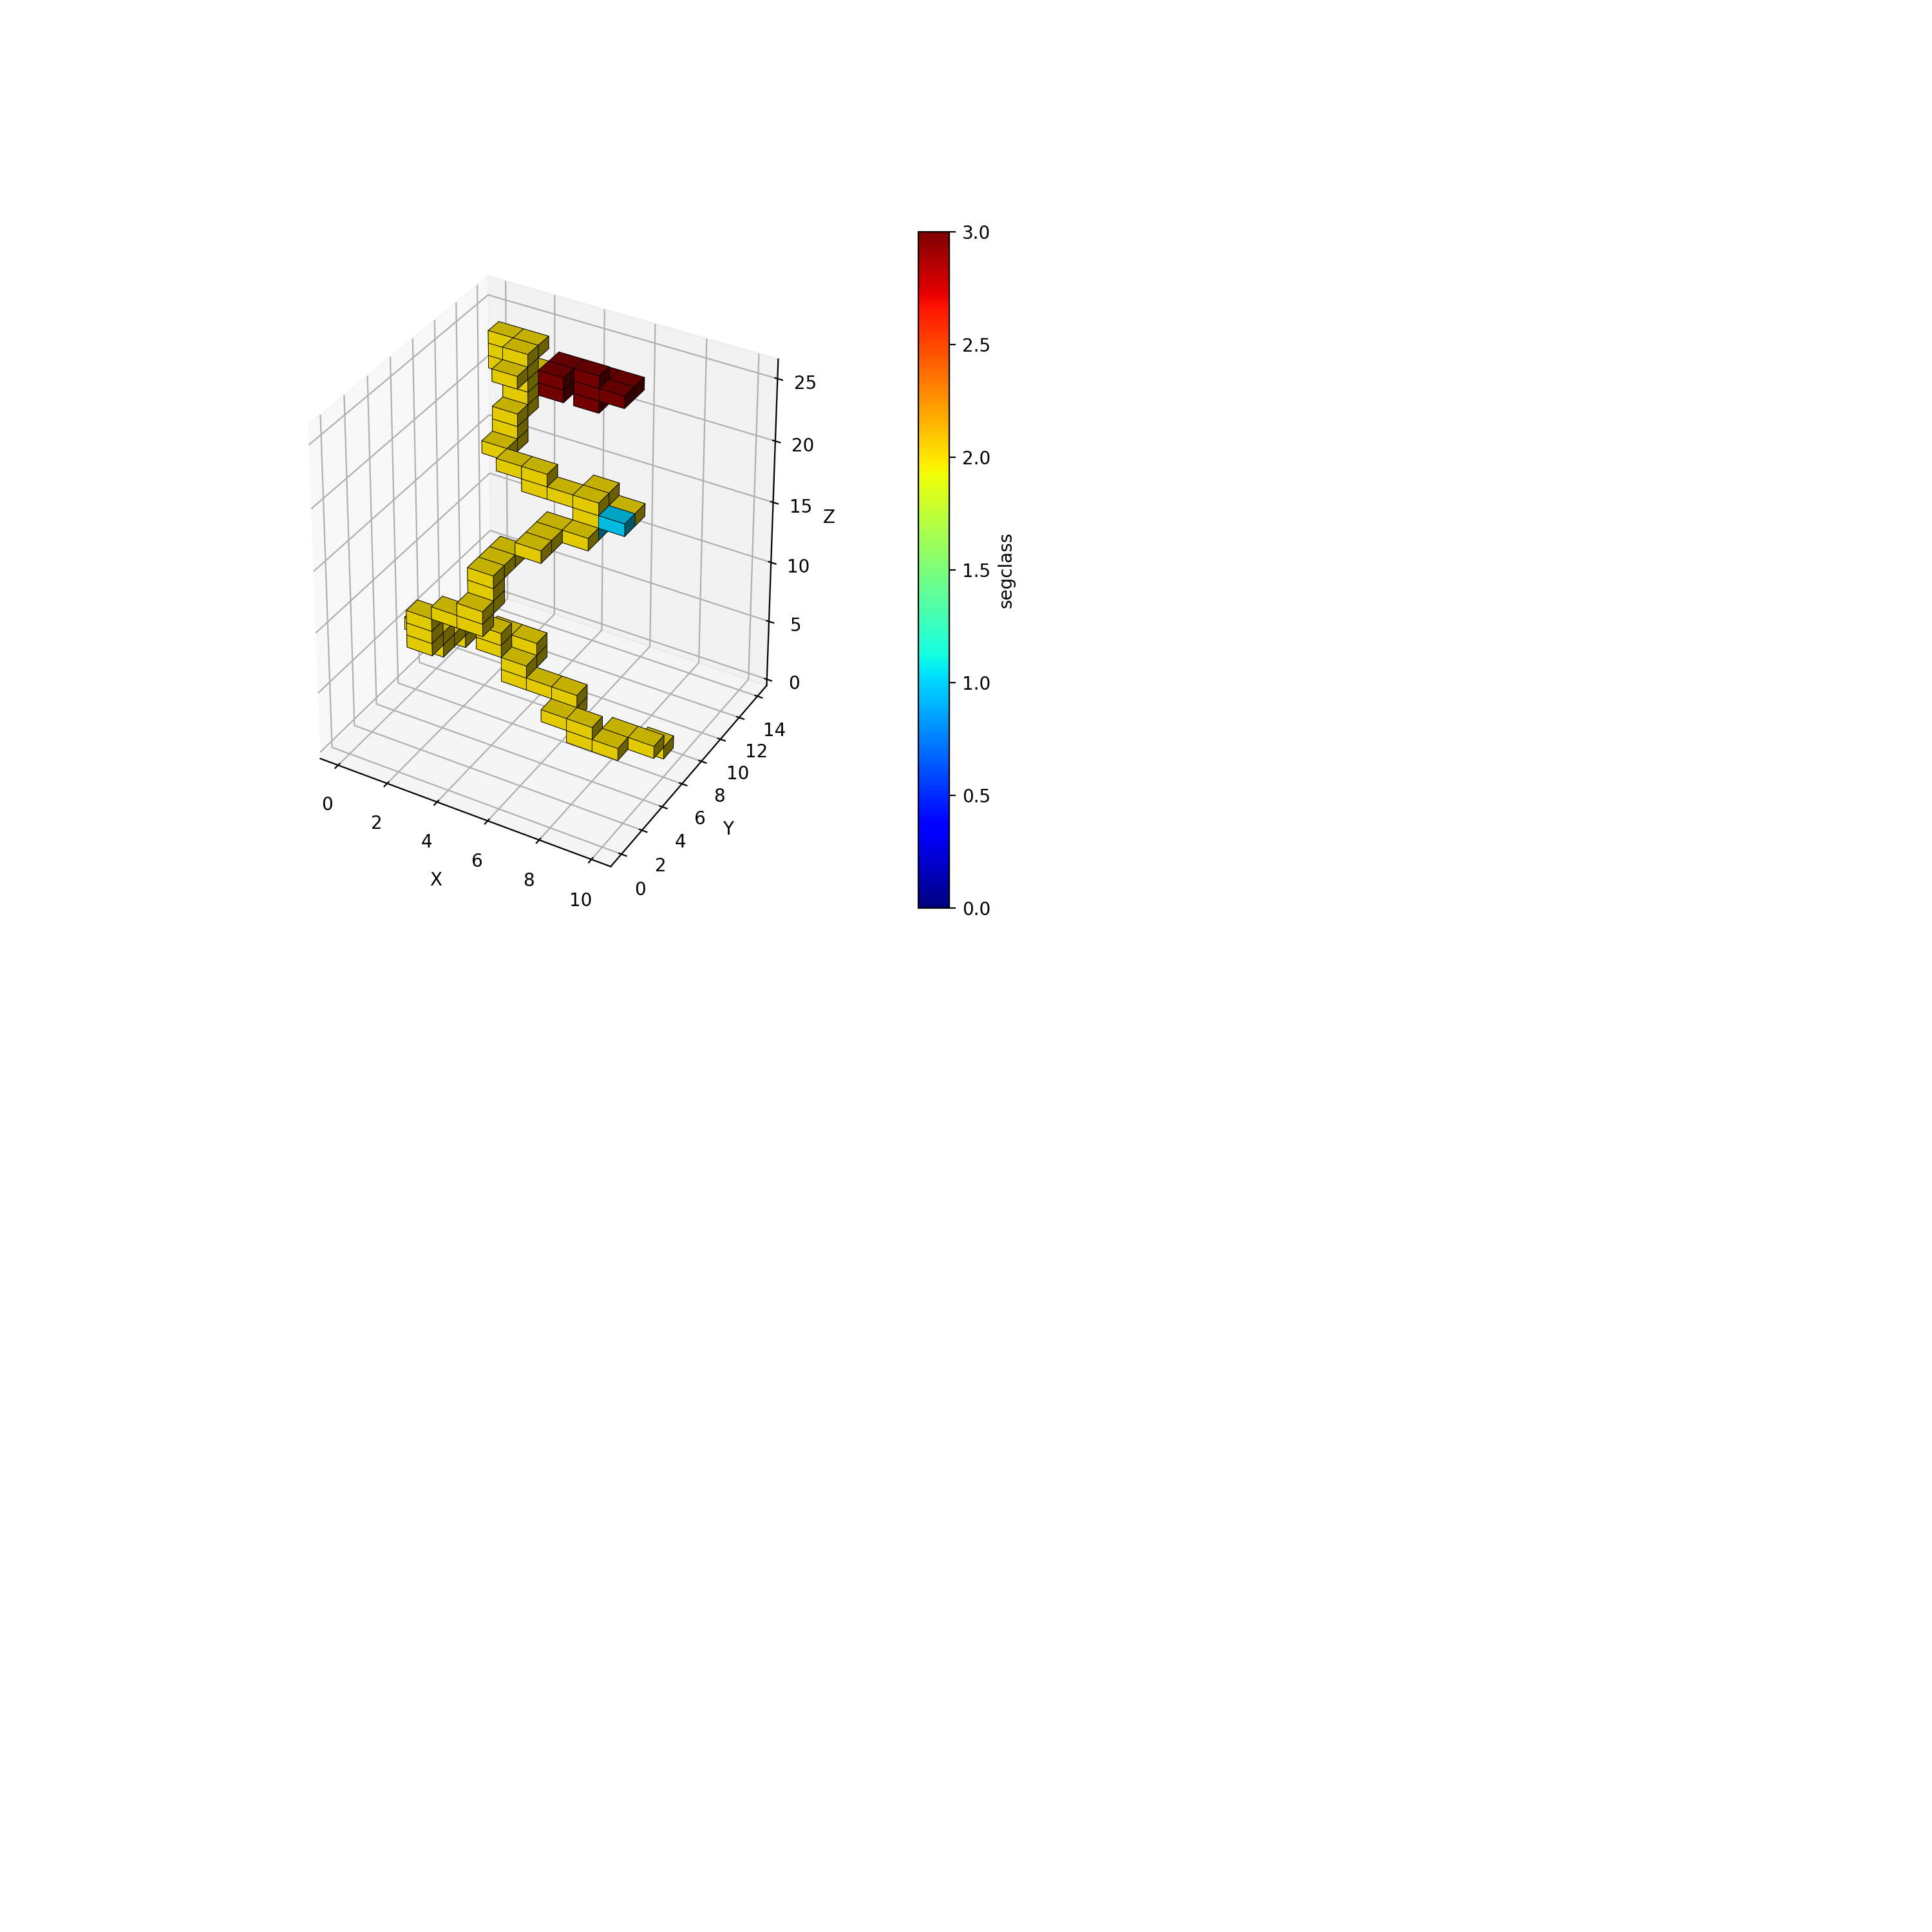

In [14]:
%matplotlib notebook
plot_3d_vox(ev_MC_vox, value = 'segclass')
plot_3d_vox(ev_MC_vox_n, value = 'segclass')
plot_3d_vox(ev_MC_vox_nn, value = 'segclass')